In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the Boston Housing dataset
iris = pd.read_csv('Iris.csv')
df = iris.copy()

In [3]:
# Show the first 5 rows from the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Checking if there is any inconsistency in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Removing the unneeded column

In [5]:
# Dropping the id column
df.drop('Id', axis=1, inplace=True)

In [6]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Exploratory Data Analaysis

Relationships between the sepal length and width

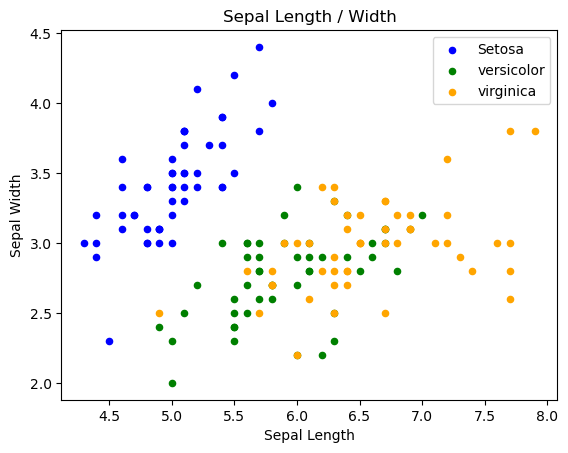

In [7]:
fig = df[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Setosa')
df[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='versicolor', ax=fig)
df[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length / Width')

plt.show()

Relationships between the petal length and width

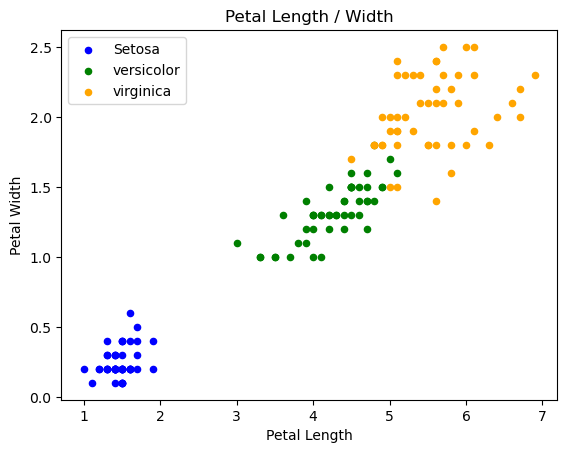

In [8]:
fig = df[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Setosa')
df[iris.Species == 'Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm', y='PetalWidthCm', color='green', label='versicolor', ax=fig)
df[iris.Species == 'Iris-virginica'].plot(kind='scatter',x='PetalLengthCm', y='PetalWidthCm', color='orange', label='virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length / Width')

plt.show()

As we can see the Petal features are giving better cluster division compared to the Sepal features.

### Distribution of the length and width

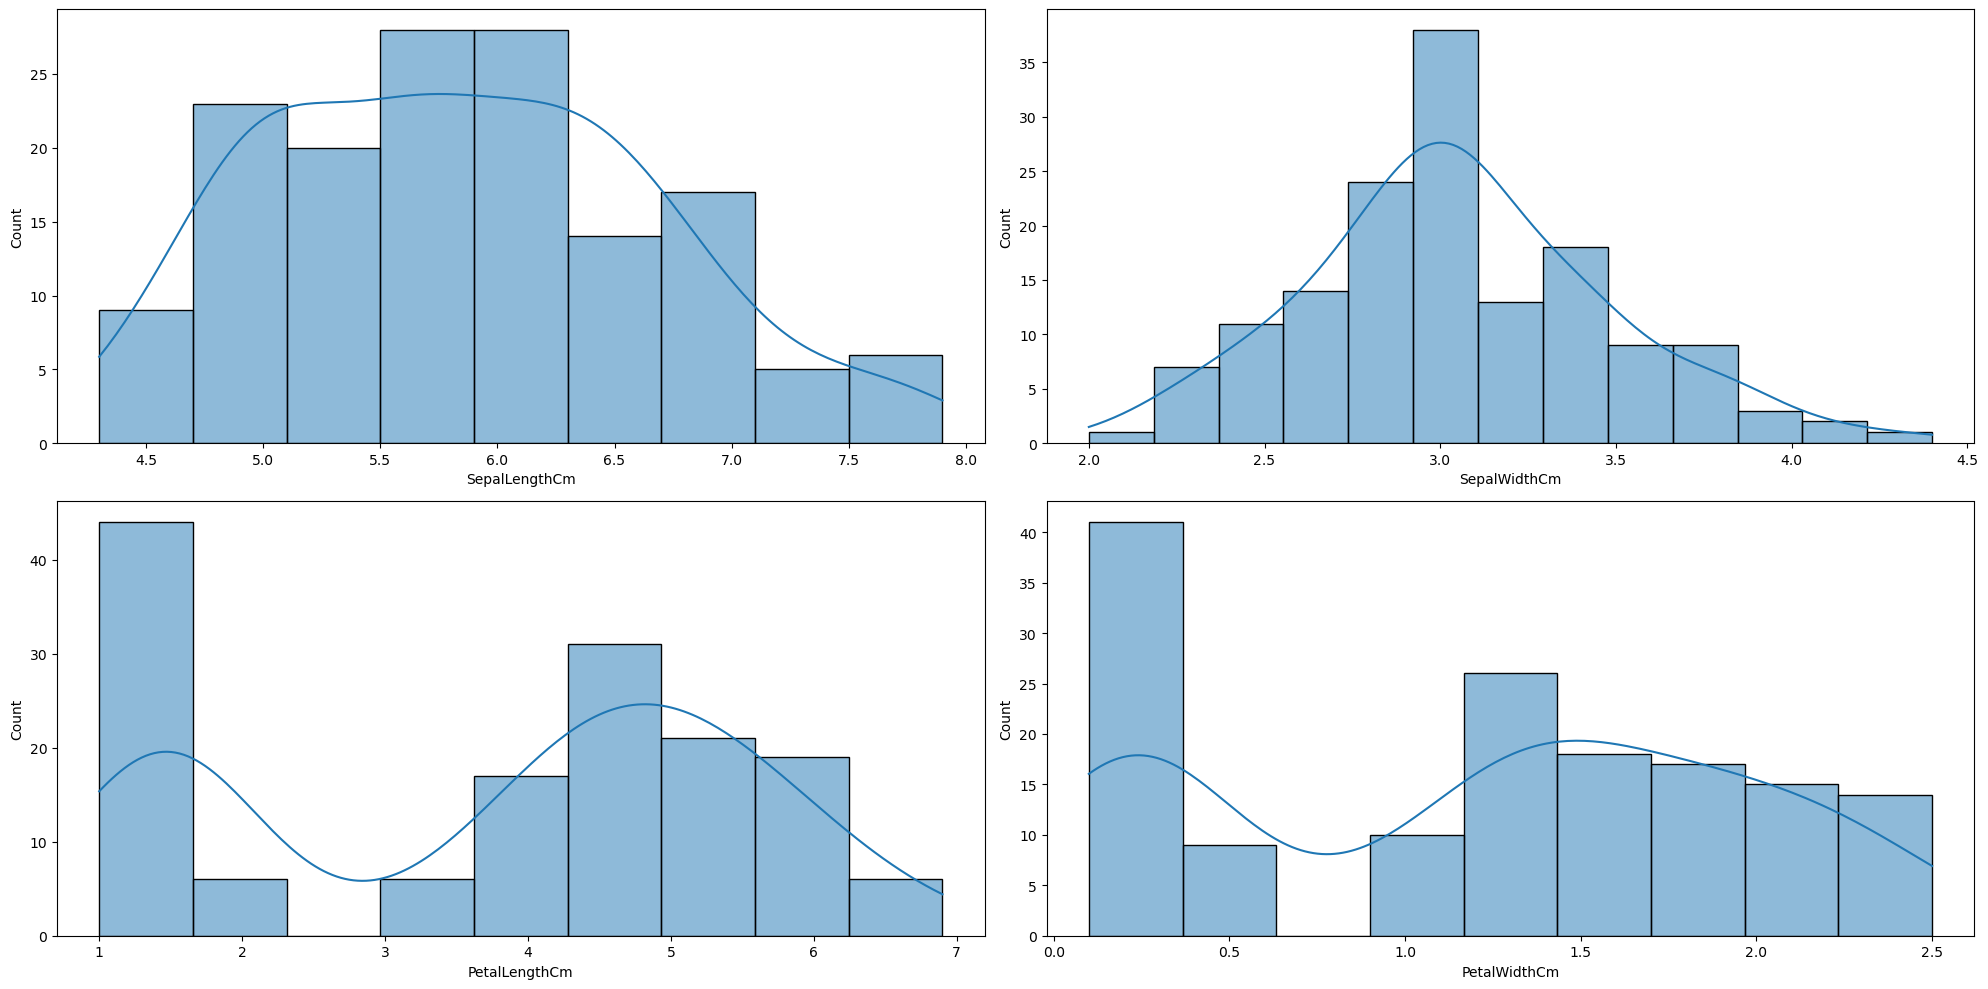

In [9]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20,10))
index = 0
axs = axs.flatten()
# Dropping 'Species' column
df2 = df.drop('Species', axis=1)
for k, v in df2.items():
    sns.histplot(data=v, ax=axs[index], kde=True)
    index += 1
plt.tight_layout()

### Length and width vary according to the specie

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

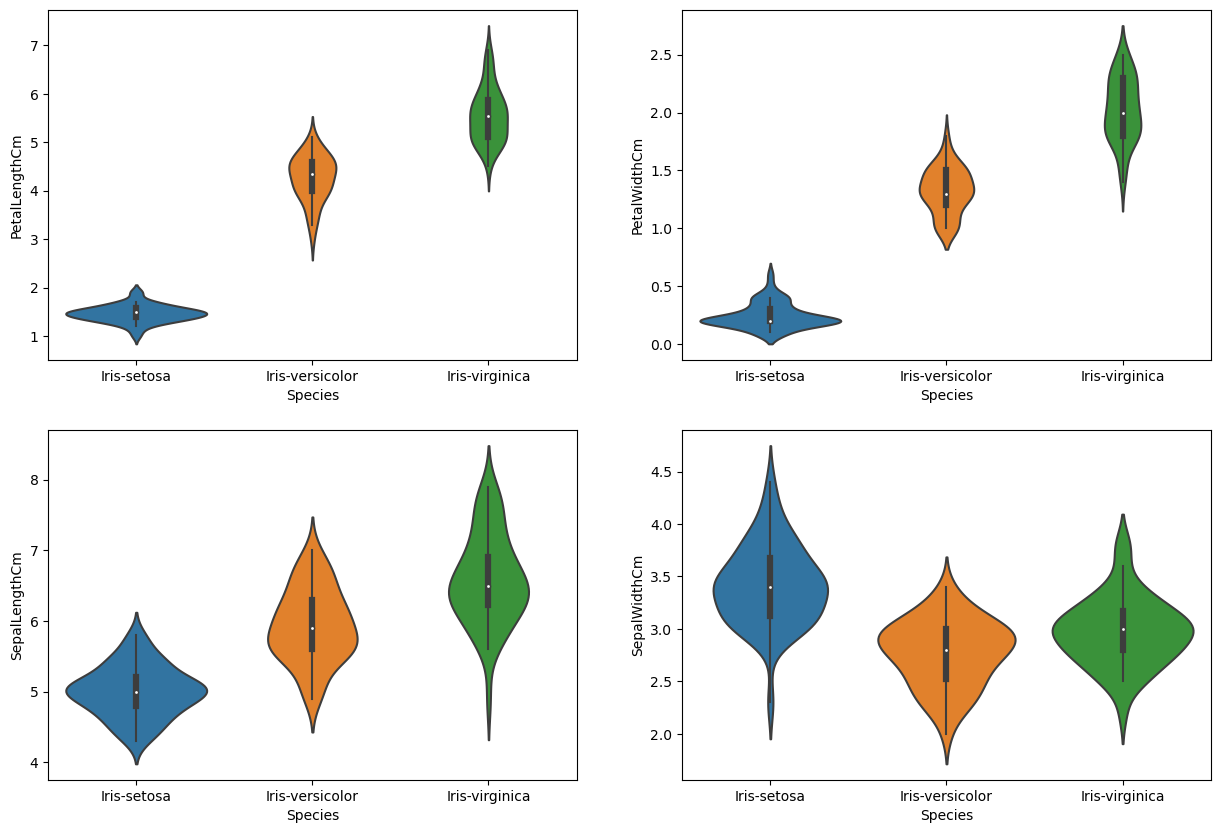

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y='PetalLengthCm', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y='PetalWidthCm', data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species', y='SepalLengthCm', data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y='SepalWidthCm', data=df)

### Correlation

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [12]:
# Shape of the dataset
df.shape

(150, 5)

<AxesSubplot:>

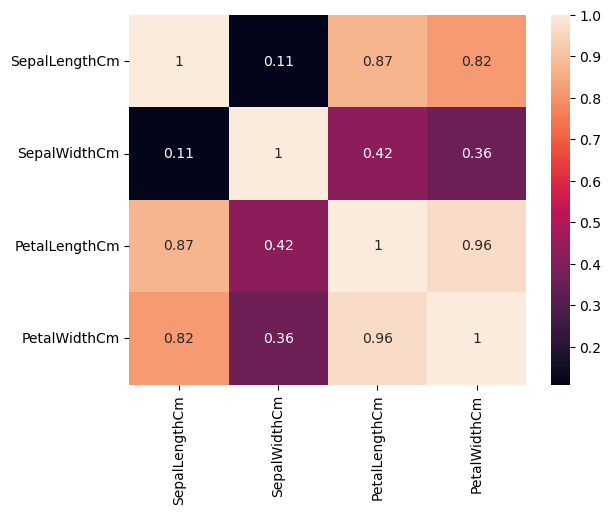

In [13]:
plt.figure()
sns.heatmap(data=df.corr().abs(), annot=True)

The SepalLength and the SepalWidth are not correlated.
The PetalWidth and the PetalLength are highly correlated.

### Splitting the data into training and testing dataset

In [14]:
train, test = train_test_split(df, test_size=0.30)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [15]:
train_x = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y = train.Species

test_x = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y = test.Species

### Support Vector Machine (SVM)

In [16]:
model = svm.SVC()
model.fit(train_x, train_y)

prediction = model.predict(test_x)
print(f"The accuracy of the SVM is: {metrics.accuracy_score(prediction, test_y)}")

The accuracy of the SVM is: 0.9777777777777777


### Logistic Regression

In [17]:
model = LogisticRegression()
model.fit(train_x, train_y)
prediction = model.predict(test_x)
print(f"The accuracy of the Logistic Regression is {metrics.accuracy_score(prediction, test_y)}")

The accuracy of the Logistic Regression is 1.0


### Decision Tree

In [18]:
model = DecisionTreeClassifier()
model.fit(train_x, train_y)
prediction = model.predict(test_x)
print(f"The accuracy of the Decision Tree is {metrics.accuracy_score(prediction, test_y)}")

The accuracy of the Decision Tree is 0.9555555555555556


### K-Nearest Neighbours

In [19]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(train_x, train_y)
prediction = model.predict(test_x)
print(f"The accuracy of the K-Nearest Neighbours is {metrics.accuracy_score(prediction, test_y)}")

The accuracy of the K-Nearest Neighbours is 1.0


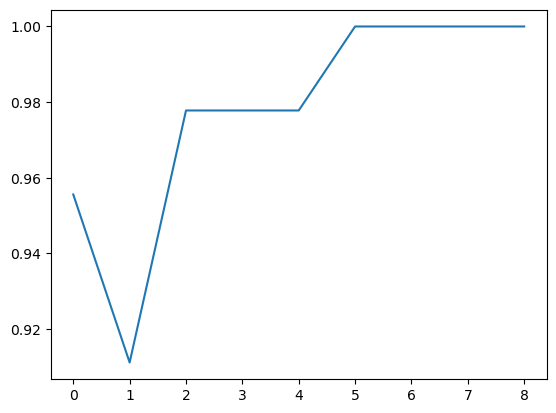

In [20]:
val_score = []
for i in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_x, train_y)
    prediction = model.predict(test_x)
    val_score.append(metrics.accuracy_score(prediction, test_y))

plt.plot(val_score)

### We used all the features of iris in above models. Now we will use Petals and Sepals Seperately

In [21]:
petal = df[['PetalLengthCm','PetalWidthCm','Species']]
sepal = df[['SepalLengthCm','SepalWidthCm','Species']]

In [22]:
# Petal
train_p, test_p = train_test_split(petal, test_size=0.2, random_state=0)

train_xp = train_p[['PetalWidthCm','PetalLengthCm']]
train_yp = train_p.Species

test_xp = test_p[['PetalWidthCm','PetalLengthCm']]
test_yp = test_p.Species


# Sepal
train_s, test_s = train_test_split(sepal, test_size=0.2, random_state=0)

train_xs = train_s[['SepalWidthCm','SepalLengthCm']]
train_ys = train_s.Species

test_xs = test_s[['SepalWidthCm','SepalLengthCm']]
test_ys = test_s.Species

### Support Vector Machine (SVG)

In [23]:
model = svm.SVC()
model.fit(train_xp, train_yp)

prediction = model.predict(test_xp)
print(f"The accuracy of the SVM using Petals is: {metrics.accuracy_score(prediction, test_yp)}")

model = svm.SVC()
model.fit(train_xs, train_ys)

prediction = model.predict(test_xs)
print(f"The accuracy of the SVM using Sepals is: {metrics.accuracy_score(prediction, test_ys)}")

The accuracy of the SVM using Petals is: 1.0
The accuracy of the SVM using Sepals is: 0.7333333333333333


### Logistic Regression

In [24]:
model = LogisticRegression()
model.fit(train_xp, train_yp)
prediction = model.predict(test_xp)
print(f"The accuracy of the Logistic Regression using Petals is {metrics.accuracy_score(prediction, test_yp)}")

model = LogisticRegression()
model.fit(train_xs, train_ys)
prediction = model.predict(test_xs)
print(f"The accuracy of the Logistic Regression using Sepals is {metrics.accuracy_score(prediction, test_ys)}")

The accuracy of the Logistic Regression using Petals is 1.0
The accuracy of the Logistic Regression using Sepals is 0.7333333333333333


### Decision Tree

In [25]:
model = DecisionTreeClassifier()
model.fit(train_xp, train_yp)
prediction = model.predict(test_xp)
print(f"The accuracy of the Decision Tree using Petals is {metrics.accuracy_score(prediction, test_yp)}")

model = DecisionTreeClassifier()
model.fit(train_xs, train_ys)
prediction = model.predict(test_xs)
print(f"The accuracy of the Decision Tree using Sepals is {metrics.accuracy_score(prediction, test_ys)}")

The accuracy of the Decision Tree using Petals is 0.9666666666666667
The accuracy of the Decision Tree using Sepals is 0.6666666666666666


### K-Nearest Neighbours

In [26]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_xp, train_yp)
prediction = model.predict(test_xp)
print(f"The accuracy of the K-Nearest Neighbours using Petals is {metrics.accuracy_score(prediction, test_yp)}")

model = KNeighborsClassifier(n_neighbors=7)
model.fit(train_xs, train_ys)
prediction = model.predict(test_xs)
print(f"The accuracy of the K-Nearest Neighbours using Sepals is {metrics.accuracy_score(prediction, test_ys)}")

The accuracy of the K-Nearest Neighbours using Petals is 1.0
The accuracy of the K-Nearest Neighbours using Sepals is 0.6333333333333333


In [27]:
# a = np.array([[4.2, 3.0]])
# model.predict(a)